---
title: "date formatting"
execute:
  freeze: auto  # re-render only when source changes
jupyter: python3
---

Here you will find several examples of how to format dates in your plots. Not many explanations are provided.

How to use this page? Find first an example of a plot you like, only then go to the code and see how it's done.

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
from datetime import timedelta
import seaborn as sns
sns.set(style="ticks", font_scale=1.5)
import matplotlib.gridspec as gridspec
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

In [30]:
import pandas as pd

start_date = '2018-01-01'
end_date = '2018-04-30'

# create date range with 1-hour intervals
dates = pd.date_range(start_date, end_date, freq='1H')
# create a random variable to plot
var = np.random.rand(len(dates)) - 0.51
var = var.cumsum()
var = var - var.min()
# create dataframe, make "date" the index
df = pd.DataFrame({'date': dates, 'variable': var})
df.set_index(df['date'], inplace=True)
df

,date,variable
date,,
2018-01-01 00:00:00,2018-01-01 00:00:00,28.317035
2018-01-01 01:00:00,2018-01-01 01:00:00,28.120523
2018-01-01 02:00:00,2018-01-01 02:00:00,28.596894
2018-01-01 03:00:00,2018-01-01 03:00:00,28.931941
2018-01-01 04:00:00,2018-01-01 04:00:00,28.561778
...,...,...
2018-04-29 20:00:00,2018-04-29 20:00:00,1.914343
2018-04-29 21:00:00,2018-04-29 21:00:00,1.648757
2018-04-29 22:00:00,2018-04-29 22:00:00,1.992956


define a useful function to plot the graphs below

In [31]:
def explanation(ax, text, letter):
    ax.text(0.99, 0.97, text,
            transform=ax.transAxes,
            horizontalalignment='right', verticalalignment='top',
            fontweight="bold")
    ax.text(0.01, 0.01, letter,
            transform=ax.transAxes,
            horizontalalignment='left', verticalalignment='bottom',
            fontweight="bold")
    ax.set(ylabel="variable (units)")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

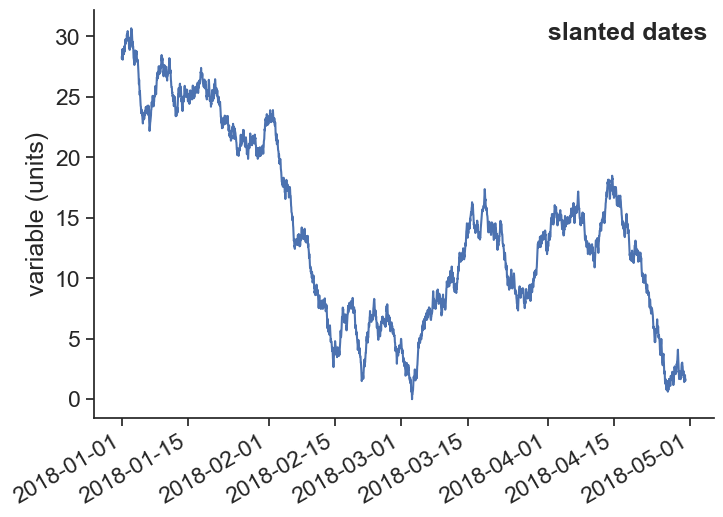

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(df['variable'])
plt.gcf().autofmt_xdate()  # makes slated dates
explanation(ax, "slanted dates", "")
fig.savefig("dates1.png")

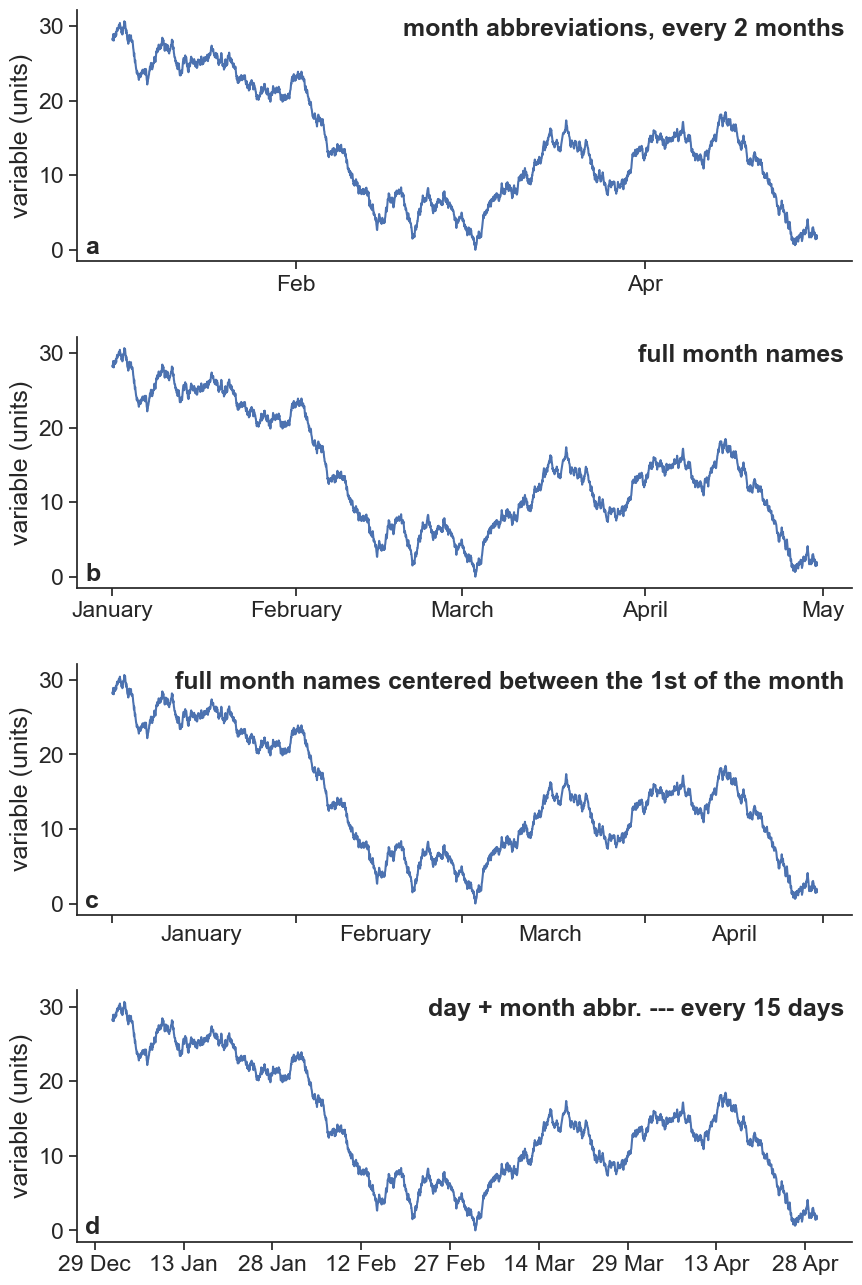

In [33]:
fig, ax = plt.subplots(4, 1, figsize=(10, 16),
                       gridspec_kw={'hspace': 0.3})

### plot a ###
ax[0].plot(df['variable'])
date_form = DateFormatter("%b")
ax[0].xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax[0].xaxis.set_major_formatter(date_form)

### plot b ###
ax[1].plot(df['variable'])
date_form = DateFormatter("%B")
ax[1].xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax[1].xaxis.set_major_formatter(date_form)

### plot c ###
ax[2].plot(df['variable'])
ax[2].xaxis.set_major_locator(mdates.MonthLocator())
# 16 is a slight approximation for the center, since months differ in number of days.
ax[2].xaxis.set_minor_locator(mdates.MonthLocator(bymonthday=16))
ax[2].xaxis.set_major_formatter(ticker.NullFormatter())
ax[2].xaxis.set_minor_formatter(DateFormatter('%B'))
for tick in ax[2].xaxis.get_minor_ticks():
    tick.tick1line.set_markersize(0)
    tick.tick2line.set_markersize(0)
    tick.label1.set_horizontalalignment('center')

### plot d ###
ax[3].plot(df['variable'])
date_form = DateFormatter("%d %b")
ax[3].xaxis.set_major_locator(mdates.DayLocator(interval=15))
ax[3].xaxis.set_major_formatter(date_form)

explanation(ax[0], "month abbreviations, every 2 months", "a")
explanation(ax[1], "full month names", "b")
explanation(ax[2], "full month names centered between the 1st of the month", "c")
explanation(ax[3], "day + month abbr. --- every 15 days", "d")

fig.savefig("dates2.png")

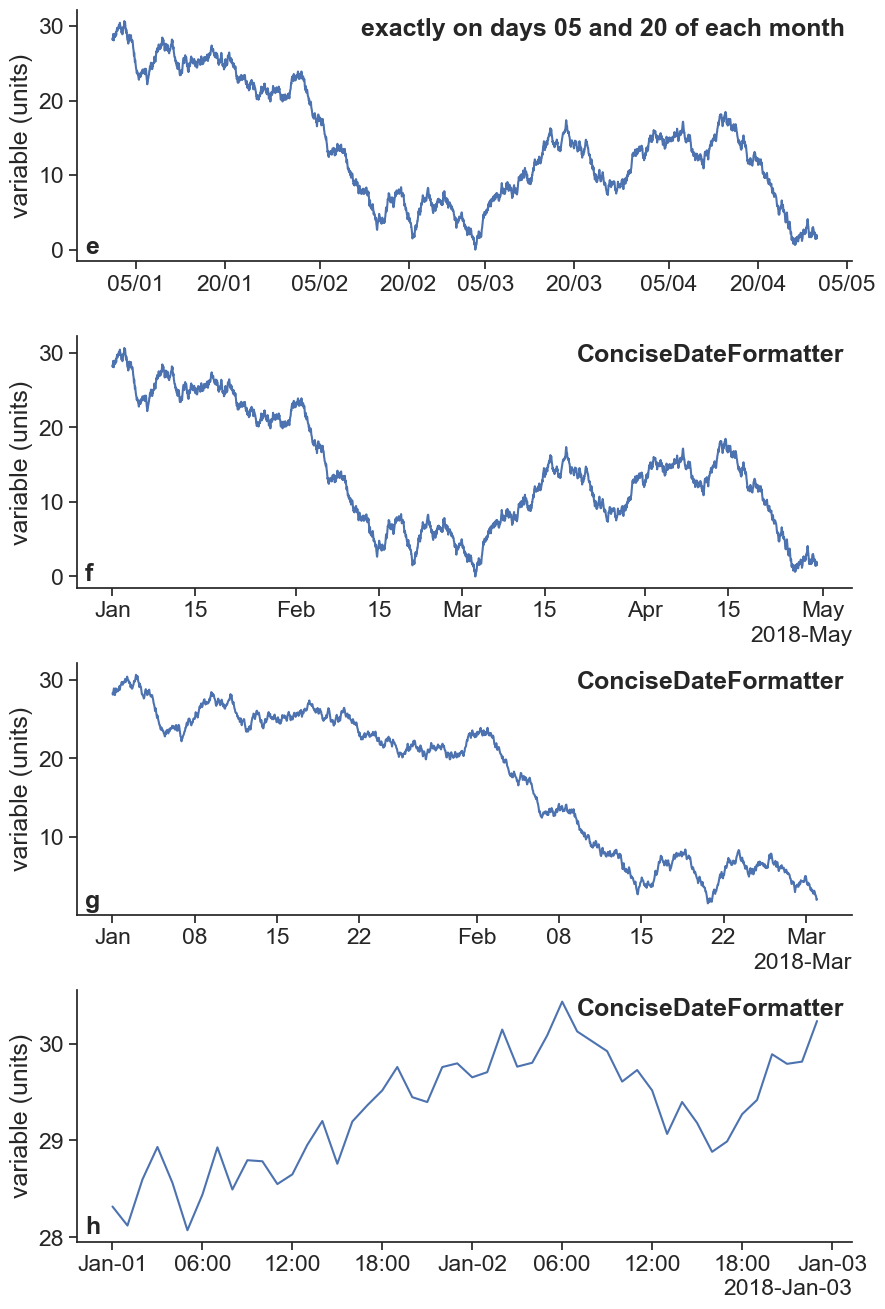

In [34]:
fig, ax = plt.subplots(4, 1, figsize=(10, 16),
                       gridspec_kw={'hspace': 0.3})

### plot e ###
ax[0].plot(df['variable'])
date_form = DateFormatter("%d/%m")
ax[0].xaxis.set_major_locator(mdates.DayLocator(bymonthday=[5, 20]))
ax[0].xaxis.set_major_formatter(date_form)

### plot f ###
ax[1].plot(df['variable'])
locator = mdates.AutoDateLocator(minticks=11, maxticks=17)
formatter = mdates.ConciseDateFormatter(locator)
ax[1].xaxis.set_major_locator(locator)
ax[1].xaxis.set_major_formatter(formatter)

### plot g ###
ax[2].plot(df.loc['2018-01-01':'2018-03-01', 'variable'])
locator = mdates.AutoDateLocator(minticks=6, maxticks=14)
formatter = mdates.ConciseDateFormatter(locator)
ax[2].xaxis.set_major_locator(locator)
ax[2].xaxis.set_major_formatter(formatter)

### plot h ###
ax[3].plot(df.loc['2018-01-01':'2018-01-02', 'variable'])
locator = mdates.AutoDateLocator(minticks=6, maxticks=10)
formatter = mdates.ConciseDateFormatter(locator)
ax[3].xaxis.set_major_locator(locator)
ax[3].xaxis.set_major_formatter(formatter)

explanation(ax[0], "exactly on days 05 and 20 of each month", "e")
explanation(ax[1], "ConciseDateFormatter", "f")
explanation(ax[2], "ConciseDateFormatter", "g")
explanation(ax[3], "ConciseDateFormatter", "h")

fig.savefig("dates3.png")

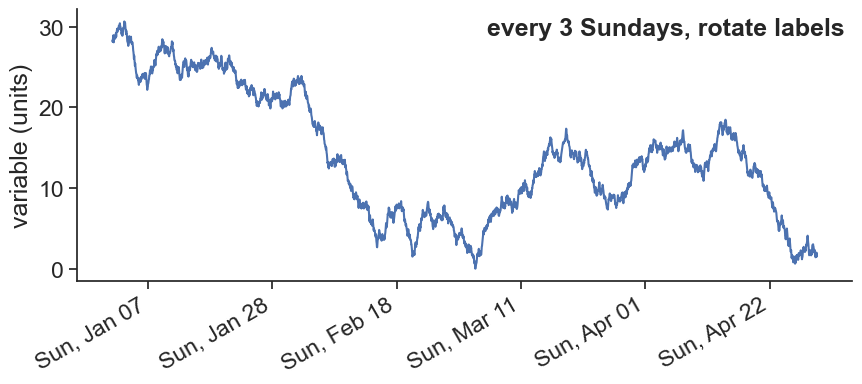

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4),
                       gridspec_kw={'hspace': 0.3})

# import constants for the days of the week
from matplotlib.dates import MO, TU, WE, TH, FR, SA, SU
ax.plot(df['variable'])
# tick on sundays every third week
loc = mdates.WeekdayLocator(byweekday=SU, interval=3)
ax.xaxis.set_major_locator(loc)
date_form = DateFormatter("%a, %b %d")
ax.xaxis.set_major_formatter(date_form)
fig.autofmt_xdate(bottom=0.2, rotation=30, ha='right')
explanation(ax, "every 3 Sundays, rotate labels", "")

| Code | Explanation                             |
|------|-----------------------------------------|
| %Y   | 4-digit year (e.g., 2022)               |
| %y   | 2-digit year (e.g., 22)                 |
| %m   | 2-digit month (e.g., 12)                |
| %B   | Full month name (e.g., December)        |
| %b   | Abbreviated month name (e.g., Dec)      |
| %d   | 2-digit day of the month (e.g., 09)     |
| %A   | Full weekday name (e.g., Tuesday)       |
| %a   | Abbreviated weekday name (e.g., Tue)    |
| %H   | 24-hour clock hour (e.g., 23)           |
| %I   | 12-hour clock hour (e.g., 11)           |
| %M   | 2-digit minute (e.g., 59)               |
| %S   | 2-digit second (e.g., 59)               |
| %p   | "AM" or "PM"                            |
| %Z   | Time zone name                          |
| %z   | Time zone offset from UTC (e.g., -0500) |